# CAPEX of CHP plants

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functions.general.utility import get_project_root
from functions.TEA import convert_currency_annual_average
from functions.TEA.scaling import CEPCI_scale


### Load Data and data wrangling
Get all data into same base year and currency.

In [2]:
# Load and display data
root_dir = get_project_root()
data_file = "CAPEX_CHP.csv"
data_file_path = os.path.join(root_dir, "data", data_file)
df = pd.read_csv(data_file_path)
df

,Process Reference,Type,CAPEX,Currency,Plant size [kWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference
0,Steam turbine for biomass oxycombustion with CCS,steam turbine,5.942000e+08,GBP,598000.00,2018,UK,NaN,NaN,Case 9; reference year estimated based on year...,https://assets.publishing.service.gov.uk/gover...
1,Steam turbine for coal oxycombustion with CCS,steam turbine,7.745000e+08,GBP,1097700.00,2018,UK,NaN,NaN,Case 9; reference year estimated based on year...,https://assets.publishing.service.gov.uk/gover...
2,Stirling Engine,stirling engine,1.020600e+06,GBP,255.15,2017,UK,NaN,NaN,CAPEX range: 3000-7200 (year 2030 vs 2012),https://doi.org/10.1016/j.energy.2017.11.106
3,Piston Engine (Skorek-Osikowska et al. Case 1),piston engine,5.798732e+05,EUR,322.21,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015
4,Piston Engine (Skorek-Osikowska et al. Case 2),piston engine,2.078835e+06,EUR,1154.02,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015
5,Piston Engine (Skorek-Osikowska et al. Example 1),piston engine,1.795602e+05,EUR,100.00,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015
6,Piston Engine (Skorek-Osikowska et al. Example 2),piston engine,9.010117e+06,EUR,5000.00,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015
7,Piston Engine based electricity generation system,piston engine,4.228242e+06,EUR,1400.08,2014,Poland,NaN,NaN,calculated from equations given in reference f...,10.1016/j.energy.2014.01.015 AND https://doi.o...
8,Steam Turbine and Steam system,steam turbine,4.584500e+07,USD,64411.00,2007,USA,NaN,NaN,"also includes steam generation system, TIC (t...",Process Design and Economics for Conversion of...
9,Combustion turbine + accessories (Shell IGCC ...,gas turbine,8.444800e+07,USD,464000.00,2019,USA,NaN,NaN,lower case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...


In [3]:
# Convert all values to same currency and update to most recent CEPCI value
updated_currency = "GBP"
updated_CEPCI_year = 2020
CAPEX_currency_scaled = []
CAPEX_currency_CEPCI_scaled = []

for row_no in df.index:
    CAPEX_currency_scaled.append(convert_currency_annual_average(value=df["CAPEX"][row_no], year=df["Reference Year"][row_no], base_currency=df["Currency"][row_no], converted_currency=updated_currency))
    CAPEX_currency_CEPCI_scaled.append(CEPCI_scale(base_year=df["Reference Year"][row_no], design_year=updated_CEPCI_year, value=CAPEX_currency_scaled[row_no]))
print("Currency scaled values:", CAPEX_currency_scaled)
print("Currency and CEPCI scaled values:", CAPEX_currency_CEPCI_scaled)

Currency scaled values: [594200000.0, 774500000.0, 1020600.0, 467462.92899784114, 1675845.9952830246, 144751.8653079781, 7263477.197727552, 3408583.643982904, 22901075.061465755, 66171706.46163287, 74170484.1657863, 92349524.40249862, 37029607.95113424, 38316653.12661644, 46438554.73910137, 646354.0876712329, 1949010.5464480876]
Currency and CEPCI scaled values: [588682639.6949096, 767308489.4710661, 1074552.422907489, 484827.4606426143, 1738097.5215789052, 150128.86568567422, 7533288.7096723, 3535200.012636322, 26043761.60872819, 63852704.47484761, 71571163.2575215, 89113115.03632578, 35731897.20736872, 43574800.61506152, 52811260.861463785, 693600.1569388679, 1949010.5464480876]


In [4]:
# Add (i) currency and (ii) currency + CEPCI scaled values to dataframe
currency_scaled_label = "CAPEX_" + updated_currency
currency_and_CEPCI_scaled_label = "CAPEX_" + updated_currency + "_CEPCI_" + str(updated_CEPCI_year)

df[currency_scaled_label] = CAPEX_currency_scaled
df[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled
df

,Process Reference,Type,CAPEX,Currency,Plant size [kWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Steam turbine for biomass oxycombustion with CCS,steam turbine,5.942000e+08,GBP,598000.00,2018,UK,NaN,NaN,Case 9; reference year estimated based on year...,https://assets.publishing.service.gov.uk/gover...,5.942000e+08,5.886826e+08
1,Steam turbine for coal oxycombustion with CCS,steam turbine,7.745000e+08,GBP,1097700.00,2018,UK,NaN,NaN,Case 9; reference year estimated based on year...,https://assets.publishing.service.gov.uk/gover...,7.745000e+08,7.673085e+08
2,Stirling Engine,stirling engine,1.020600e+06,GBP,255.15,2017,UK,NaN,NaN,CAPEX range: 3000-7200 (year 2030 vs 2012),https://doi.org/10.1016/j.energy.2017.11.106,1.020600e+06,1.074552e+06
3,Piston Engine (Skorek-Osikowska et al. Case 1),piston engine,5.798732e+05,EUR,322.21,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,4.674629e+05,4.848275e+05
4,Piston Engine (Skorek-Osikowska et al. Case 2),piston engine,2.078835e+06,EUR,1154.02,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,1.675846e+06,1.738098e+06
5,Piston Engine (Skorek-Osikowska et al. Example 1),piston engine,1.795602e+05,EUR,100.00,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,1.447519e+05,1.501289e+05
6,Piston Engine (Skorek-Osikowska et al. Example 2),piston engine,9.010117e+06,EUR,5000.00,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,7.263477e+06,7.533289e+06
7,Piston Engine based electricity generation system,piston engine,4.228242e+06,EUR,1400.08,2014,Poland,NaN,NaN,calculated from equations given in reference f...,10.1016/j.energy.2014.01.015 AND https://doi.o...,3.408584e+06,3.535200e+06
8,Steam Turbine and Steam system,steam turbine,4.584500e+07,USD,64411.00,2007,USA,NaN,NaN,"also includes steam generation system, TIC (t...",Process Design and Economics for Conversion of...,2.290108e+07,2.604376e+07
9,Combustion turbine + accessories (Shell IGCC ...,gas turbine,8.444800e+07,USD,464000.00,2019,USA,NaN,NaN,lower case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,6.617171e+07,6.385270e+07


### Plot complete data set

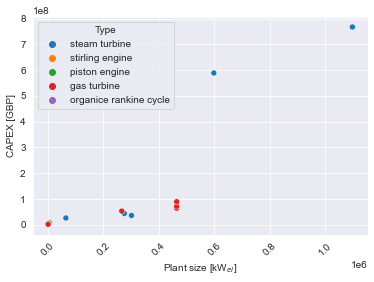

In [5]:
# Plot all data
sns.scatterplot(data=df, x="Plant size [kWel]" ,y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [kW${_{el}}$]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

Data points are extremely spaced.
Split data set into a smaller and more medium-sized plants.

### Plants of small size (i.e. < 2000 kWel)

In [6]:
# Get df of plants with a size smaller than 2 MWel
df_small = df[df["Plant size [kWel]"] < 2000].copy()
df_small

,Process Reference,Type,CAPEX,Currency,Plant size [kWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
2,Stirling Engine,stirling engine,1020600.00,GBP,255.15,2017,UK,NaN,NaN,CAPEX range: 3000-7200 (year 2030 vs 2012),https://doi.org/10.1016/j.energy.2017.11.106,1.020600e+06,1.074552e+06
3,Piston Engine (Skorek-Osikowska et al. Case 1),piston engine,579873.17,EUR,322.21,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,4.674629e+05,4.848275e+05
4,Piston Engine (Skorek-Osikowska et al. Case 2),piston engine,2078834.64,EUR,1154.02,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,1.675846e+06,1.738098e+06
5,Piston Engine (Skorek-Osikowska et al. Example 1),piston engine,179560.17,EUR,100.00,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,1.447519e+05,1.501289e+05
7,Piston Engine based electricity generation system,piston engine,4228241.60,EUR,1400.08,2014,Poland,NaN,NaN,calculated from equations given in reference f...,10.1016/j.energy.2014.01.015 AND https://doi.o...,3.408584e+06,3.535200e+06
15,Organice Rankine cycle + syngas combustor,organice rankine cycle,890000.00,EUR,400.00,2015,Italy,NaN,NaN,alternatively 18 tonne SRF per day,10.1016/j.fuproc.2014.11.003,6.463541e+05,6.936002e+05
16,Equipment Cost - Gas turbine,gas turbine,2500000.00,USD,419.00,2020,USA,NaN,NaN,altneratively 876 tonnes/year,https://doi.org/10.1016/j.compchemeng.2020.106758,1.949011e+06,1.949011e+06


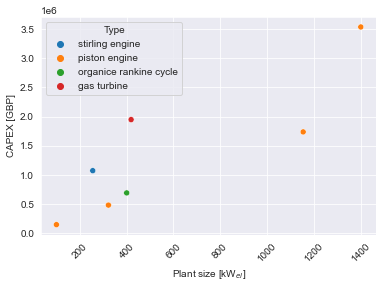

In [7]:
# Plot data - differentiate by type
sns.scatterplot(data=df_small, x="Plant size [kWel]" ,y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [kW${_{el}}$]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

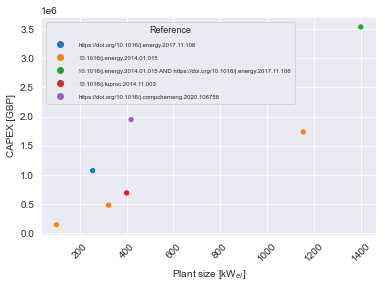

In [8]:
# Plot data - differentiate by Reference
small_df_by_ref = sns.scatterplot(data=df_small, x="Plant size [kWel]" ,y=currency_and_CEPCI_scaled_label, hue="Reference")
plt.setp(small_df_by_ref.get_legend().get_texts(), fontsize='6')
plt.setp(small_df_by_ref.get_legend().get_title(), fontsize='9')

plt.xlabel("Plant size [kW${_{el}}$]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

### Plants of larger size (i.e. > 2,000 kWel)

In [9]:
# Get df of plants with a size larger than 2 MWel
df_large = df[df["Plant size [kWel]"] > 2000].copy()
df_large

,Process Reference,Type,CAPEX,Currency,Plant size [kWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Steam turbine for biomass oxycombustion with CCS,steam turbine,5.942000e+08,GBP,598000.0,2018,UK,NaN,NaN,Case 9; reference year estimated based on year...,https://assets.publishing.service.gov.uk/gover...,5.942000e+08,5.886826e+08
1,Steam turbine for coal oxycombustion with CCS,steam turbine,7.745000e+08,GBP,1097700.0,2018,UK,NaN,NaN,Case 9; reference year estimated based on year...,https://assets.publishing.service.gov.uk/gover...,7.745000e+08,7.673085e+08
6,Piston Engine (Skorek-Osikowska et al. Example 2),piston engine,9.010117e+06,EUR,5000.0,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,7.263477e+06,7.533289e+06
8,Steam Turbine and Steam system,steam turbine,4.584500e+07,USD,64411.0,2007,USA,NaN,NaN,"also includes steam generation system, TIC (t...",Process Design and Economics for Conversion of...,2.290108e+07,2.604376e+07
9,Combustion turbine + accessories (Shell IGCC ...,gas turbine,8.444800e+07,USD,464000.0,2019,USA,NaN,NaN,lower case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,6.617171e+07,6.385270e+07
10,Combustion turbine + accessories (Shell IGCC ...,gas turbine,9.465600e+07,USD,464000.0,2019,USA,NaN,NaN,middle case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,7.417048e+07,7.157116e+07
11,Combustion turbine + accessories (Shell IGCC ...,gas turbine,1.178560e+08,USD,464000.0,2019,USA,NaN,NaN,upper case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,9.234952e+07,8.911312e+07
12,Steam turbine + accessories (Shell IGCC and E...,steam turbine,4.725700e+07,USD,301000.0,2019,USA,NaN,NaN,middle case only as too little variation,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,3.702961e+07,3.573190e+07
13,Steam cycle,steam turbine,7.670500e+07,USD,275000.0,2007,USA,0.67,1.15,original cost scaled up by installation factor...,Fischer-tropsch fuels from coal and biomass,3.831665e+07,4.357480e+07
14,Gas turbine,gas turbine,9.296400e+07,USD,266000.0,2007,USA,0.75,1.27,original cost scaled up by installation factor...,Fischer-tropsch fuels from coal and biomass,4.643855e+07,5.281126e+07


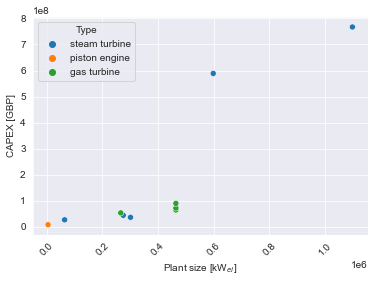

In [10]:
# Plot all large data - differentiate by type
sns.scatterplot(data=df_large, x="Plant size [kWel]" ,y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [kW${_{el}}$]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

### Plants of medium size (i.e. > 5,000 kWel and < 500,000)
Discard very lage plants - they seem to be outliers.
Also discard 5,000 kWel plant as its too far off from rest of data.

In [11]:
# Get df of plants with a medium size
df_medium = df[(df["Plant size [kWel]"] > 5000) & (df["Plant size [kWel]"] <= 500000)].copy()
df_medium

,Process Reference,Type,CAPEX,Currency,Plant size [kWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
8,Steam Turbine and Steam system,steam turbine,45845000.0,USD,64411.0,2007,USA,NaN,NaN,"also includes steam generation system, TIC (t...",Process Design and Economics for Conversion of...,2.290108e+07,2.604376e+07
9,Combustion turbine + accessories (Shell IGCC ...,gas turbine,84448000.0,USD,464000.0,2019,USA,NaN,NaN,lower case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,6.617171e+07,6.385270e+07
10,Combustion turbine + accessories (Shell IGCC ...,gas turbine,94656000.0,USD,464000.0,2019,USA,NaN,NaN,middle case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,7.417048e+07,7.157116e+07
11,Combustion turbine + accessories (Shell IGCC ...,gas turbine,117856000.0,USD,464000.0,2019,USA,NaN,NaN,upper case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,9.234952e+07,8.911312e+07
12,Steam turbine + accessories (Shell IGCC and E...,steam turbine,47257000.0,USD,301000.0,2019,USA,NaN,NaN,middle case only as too little variation,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,3.702961e+07,3.573190e+07
13,Steam cycle,steam turbine,76705000.0,USD,275000.0,2007,USA,0.67,1.15,original cost scaled up by installation factor...,Fischer-tropsch fuels from coal and biomass,3.831665e+07,4.357480e+07
14,Gas turbine,gas turbine,92964000.0,USD,266000.0,2007,USA,0.75,1.27,original cost scaled up by installation factor...,Fischer-tropsch fuels from coal and biomass,4.643855e+07,5.281126e+07


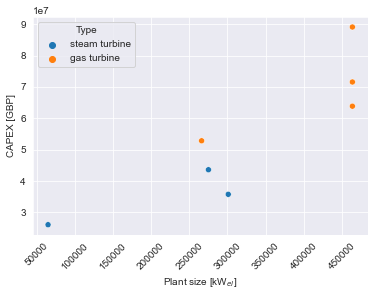

In [12]:
# Plot all medium data - differentiate by type
sns.scatterplot(data=df_medium, x="Plant size [kWel]" ,y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [kW${_{el}}$]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

### Combine small and medium sized plant data set

In [13]:
small_med_df = pd.concat([df_small,df_medium])
small_med_df

,Process Reference,Type,CAPEX,Currency,Plant size [kWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
2,Stirling Engine,stirling engine,1.020600e+06,GBP,255.15,2017,UK,NaN,NaN,CAPEX range: 3000-7200 (year 2030 vs 2012),https://doi.org/10.1016/j.energy.2017.11.106,1.020600e+06,1.074552e+06
3,Piston Engine (Skorek-Osikowska et al. Case 1),piston engine,5.798732e+05,EUR,322.21,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,4.674629e+05,4.848275e+05
4,Piston Engine (Skorek-Osikowska et al. Case 2),piston engine,2.078835e+06,EUR,1154.02,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,1.675846e+06,1.738098e+06
5,Piston Engine (Skorek-Osikowska et al. Example 1),piston engine,1.795602e+05,EUR,100.00,2014,Poland,NaN,NaN,cost estimated from equation 25; power of indi...,10.1016/j.energy.2014.01.015,1.447519e+05,1.501289e+05
7,Piston Engine based electricity generation system,piston engine,4.228242e+06,EUR,1400.08,2014,Poland,NaN,NaN,calculated from equations given in reference f...,10.1016/j.energy.2014.01.015 AND https://doi.o...,3.408584e+06,3.535200e+06
15,Organice Rankine cycle + syngas combustor,organice rankine cycle,8.900000e+05,EUR,400.00,2015,Italy,NaN,NaN,alternatively 18 tonne SRF per day,10.1016/j.fuproc.2014.11.003,6.463541e+05,6.936002e+05
16,Equipment Cost - Gas turbine,gas turbine,2.500000e+06,USD,419.00,2020,USA,NaN,NaN,altneratively 876 tonnes/year,https://doi.org/10.1016/j.compchemeng.2020.106758,1.949011e+06,1.949011e+06
8,Steam Turbine and Steam system,steam turbine,4.584500e+07,USD,64411.00,2007,USA,NaN,NaN,"also includes steam generation system, TIC (t...",Process Design and Economics for Conversion of...,2.290108e+07,2.604376e+07
9,Combustion turbine + accessories (Shell IGCC ...,gas turbine,8.444800e+07,USD,464000.00,2019,USA,NaN,NaN,lower case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,6.617171e+07,6.385270e+07
10,Combustion turbine + accessories (Shell IGCC ...,gas turbine,9.465600e+07,USD,464000.00,2019,USA,NaN,NaN,middle case,COST AND PERFORMANCE BASELINE FOR FOSSIL ENERG...,7.417048e+07,7.157116e+07


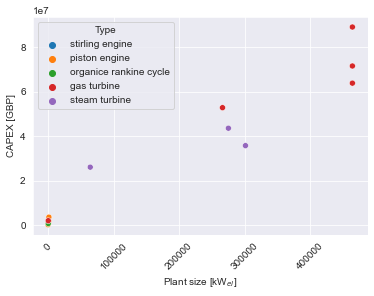

In [14]:
# Plot all medium data - differentiate by type
sns.scatterplot(data=small_med_df, x="Plant size [kWel]" ,y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [kW${_{el}}$]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

Can identify 2 clusters here - small data set and larger data set - fit two individual models.

### Add regression fit to plots

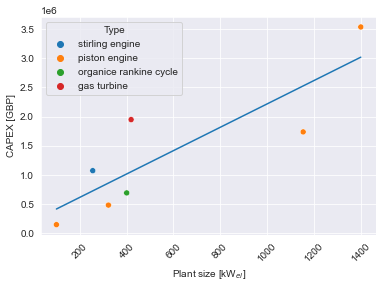

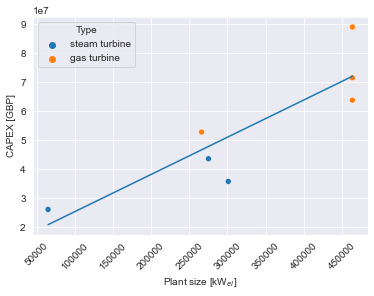

In [15]:
def plot_scatter_with_fit(dataset):

    fit_coefficients = np.polyfit(x=dataset["Plant size [kWel]"] ,y=dataset[currency_and_CEPCI_scaled_label], deg=1)
    fit_coefficients_slope = fit_coefficients[0]
    fit_coefficients_intercept = fit_coefficients[1]

    x_values_fit = [min(dataset["Plant size [kWel]"]), max(dataset["Plant size [kWel]"])]
    y_values_fit = [fit_coefficients_slope*values + fit_coefficients_intercept  for values in x_values_fit]

    # Plot with fit
    sns.scatterplot(data=dataset, x="Plant size [kWel]" ,y=currency_and_CEPCI_scaled_label, hue="Type")
    plt.plot(x_values_fit, y_values_fit)
    plt.xlabel("Plant size [kW${_{el}}$]")
    plt.ylabel("CAPEX [GBP]")
    plt.xticks(rotation=45)
    plt.show()

    return x_values_fit, y_values_fit

small_fitted_values = plot_scatter_with_fit(df_small)
medium_fitted_values = plot_scatter_with_fit(df_medium)


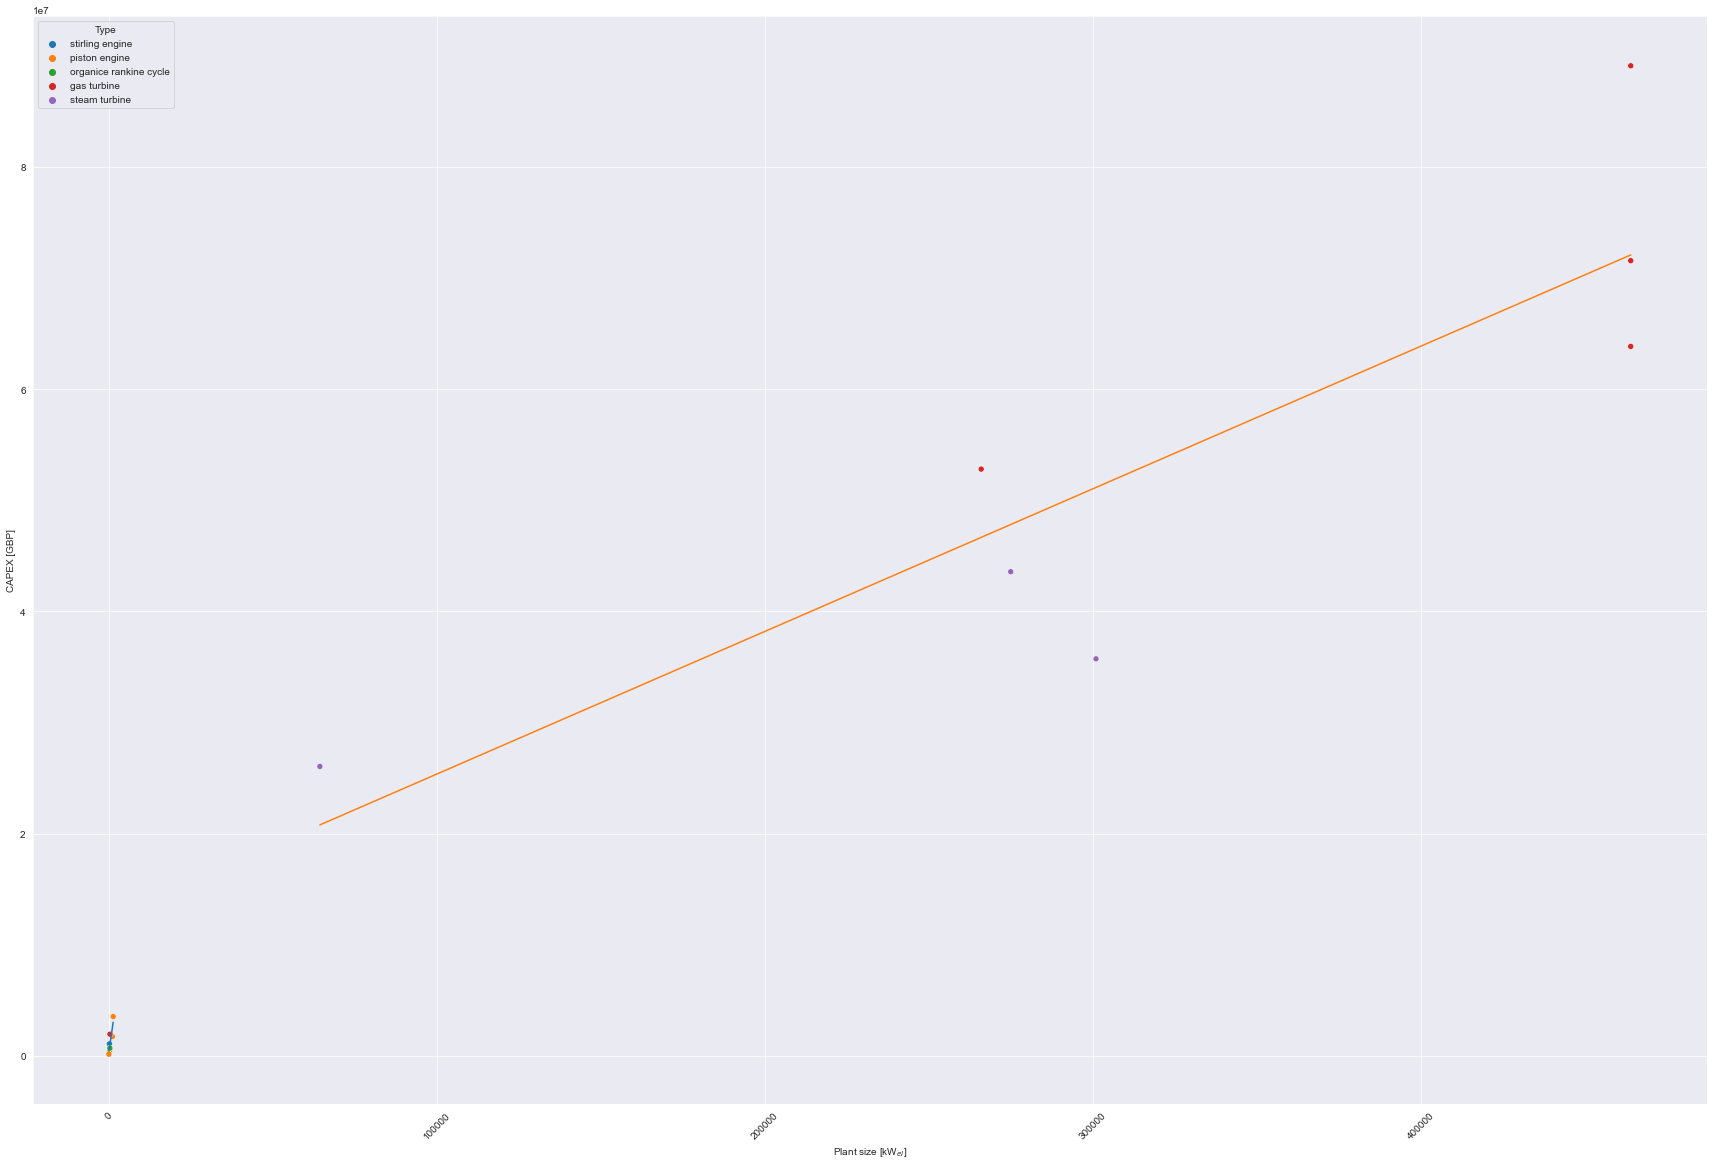

In [16]:
# Plot both fits
fig, ax = plt.subplots(figsize=(30,20))
sns.scatterplot(data=small_med_df, x="Plant size [kWel]" ,y=currency_and_CEPCI_scaled_label, hue="Type")
plt.plot(small_fitted_values[0], small_fitted_values[1])
plt.plot(medium_fitted_values[0], medium_fitted_values[1])
plt.xlabel("Plant size [kW${_{el}}$]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

### Models with sklearn

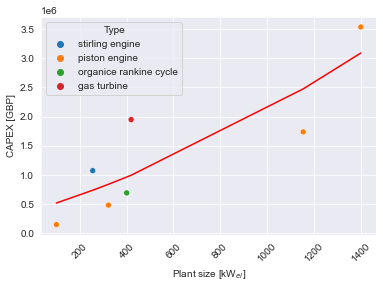

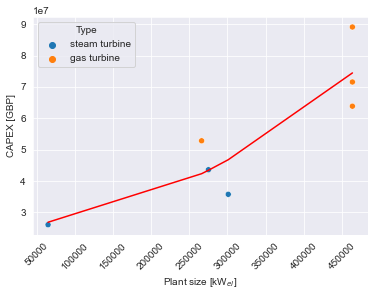

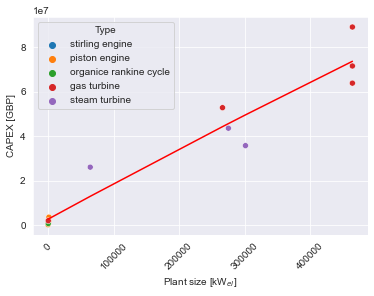

{'model': LinearRegression(),
 'R2': 0.7366833481244408,
 'RMSE': 547718.9235354001,
 'predictions': array([ 520725.55569679,  739386.20412138,  841260.67510677,
         965003.64258488,  996136.27091811, 2474375.42762919,
        3088529.21078084]),
 'degree': 2}

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


def local_get_polynomial_model_and_performance(dataset, display_fit=True):
    # Extract x and y data and sort it
    x = dataset["Plant size [kWel]"]
    y = dataset[currency_and_CEPCI_scaled_label]
    temp_sorting_df = pd.DataFrame({'x_sorted':x, 'y_sorted':y})
    temp_sorting_df = temp_sorting_df.sort_values('x_sorted')
    x = np.array(temp_sorting_df["x_sorted"])
    y = np.array(temp_sorting_df["y_sorted"])


    def fit_polynomial_regression_and_get_performance(degree):
        """
        Fits nth degree polynomial and returns regression models and its performance.

        Parameters
        ----------
        degree: int

        Returns
        -------

        """
        # Get polynomial features and fit regression model
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        poly_features = poly.fit_transform(x.reshape(-1, 1))
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y)
        y_predicted = poly_reg_model.predict(poly_features)

        # Get error scores
        model_r2 = r2_score(y, y_predicted)
        model_rmse = mean_squared_error(y, y_predicted, squared=False)

        return {"model": poly_reg_model, "R2": model_r2, "RMSE": model_rmse, "predictions": y_predicted, "degree": degree}

    # Check if 1st or 2nd degree polynomial performs better
    first_degree_results = fit_polynomial_regression_and_get_performance(degree=1)
    second_degree_results = fit_polynomial_regression_and_get_performance(degree=2)
    if first_degree_results["RMSE"] < second_degree_results["RMSE"]:
        results = first_degree_results
    else:
        results = second_degree_results


    if display_fit:
        # Plot with fit
        sns.scatterplot(data=dataset, x="Plant size [kWel]" ,y=currency_and_CEPCI_scaled_label, hue="Type")
        plt.plot(x, results["predictions"], c="red")
        plt.xlabel("Plant size [kW${_{el}}$]")
        plt.ylabel("CAPEX [GBP]")
        plt.xticks(rotation=45)
        plt.show()

    return results

df_small_results_local = local_get_polynomial_model_and_performance(df_small)
df_medium_results_local = local_get_polynomial_model_and_performance(df_medium)
df_small_med_results_local = local_get_polynomial_model_and_performance(small_med_df)
df_small_results_local

### Example model predictions

Small data set only


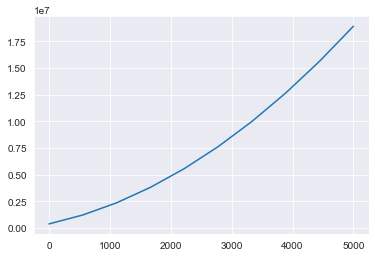

Large data set only


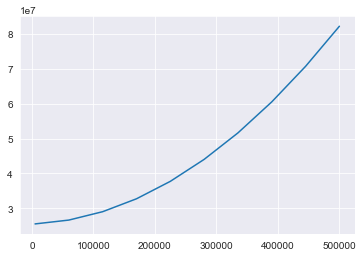

Combined data sets


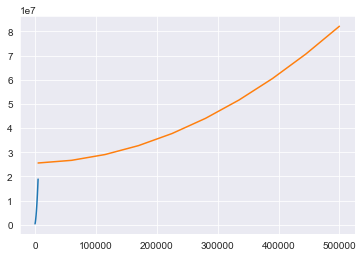

In [18]:
# Get predictions from model

x_test_small = np.linspace(0, 5000, 10)
x_test_medium = np.linspace(5000, 500000, 10)

poly_test_small_local = PolynomialFeatures(degree=df_small_results_local["degree"], include_bias=False)
poly_test_small_local.fit_transform(x_test_small.reshape(-1, 1))
y_pred_test_small_local = df_small_results_local["model"].predict(poly_test_small_local.fit_transform(x_test_small.reshape(-1, 1)))

poly_test_medium_local = PolynomialFeatures(degree=df_medium_results_local["degree"], include_bias=False)
poly_test_medium_local.fit_transform(x_test_medium.reshape(-1, 1))
y_pred_test_medium_local = df_medium_results_local["model"].predict(poly_test_medium_local.fit_transform(x_test_medium.reshape(-1, 1)))

print("Small data set only")
fig, ax = plt.subplots()
ax.plot(x_test_small, y_pred_test_small_local)
plt.show()

print("Large data set only")
fig, ax = plt.subplots()
ax.plot(x_test_medium, y_pred_test_medium_local)
plt.show()

print("Combined data sets")
fig, ax = plt.subplots()
ax.plot(x_test_small, y_pred_test_small_local)
ax.plot(x_test_medium, y_pred_test_medium_local)
plt.show()



### Use global function to compare results

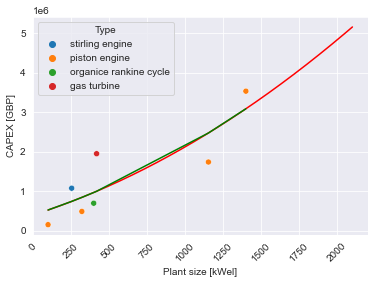

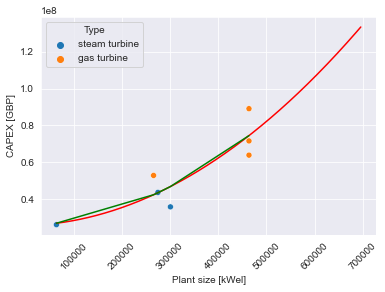

In [19]:
from functions.general.curve_fitting.depreciated.polynomial_regression_model_builder import \
    get_polynomial_model_and_performance

df_small_results_global = get_polynomial_model_and_performance(dataframe=df_small,
                                                               x_data_label="Plant size [kWel]",
                                                               y_data_label=currency_and_CEPCI_scaled_label,
                                                               degree=2,
                                                               plot_x_label="Plant size [kWel]",
                                                               plot_y_label="CAPEX [GBP]",
                                                               plot_hue_label="Type",
                                                               display_fit=True)

df_medium_results_global = get_polynomial_model_and_performance(dataframe=df_medium,
                                                                x_data_label="Plant size [kWel]",
                                                                y_data_label=currency_and_CEPCI_scaled_label,
                                                                degree=2,
                                                                plot_x_label="Plant size [kWel]",
                                                                plot_y_label="CAPEX [GBP]",
                                                                plot_hue_label="Type",
                                                                display_fit=True)



Small data set only


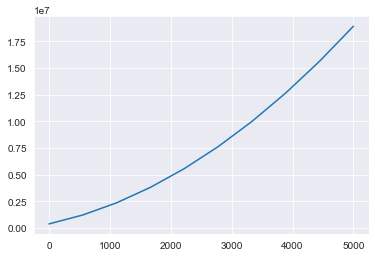

Large data set only


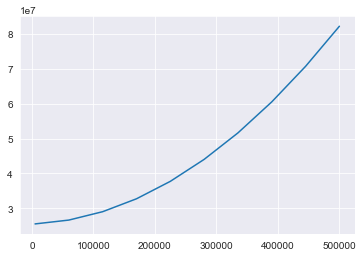

Combined data sets


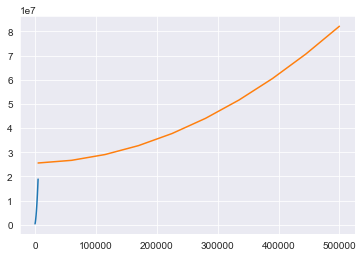

In [20]:
# Get predictions from model

x_test_small = np.linspace(0, 5000, 10)
x_test_medium = np.linspace(5000, 500000, 10)

poly_test_small_global = PolynomialFeatures(degree=df_small_results_global["degree"], include_bias=False)
poly_test_small_global.fit_transform(x_test_small.reshape(-1, 1))
y_pred_test_small_global = df_small_results_global["model"].predict(poly_test_small_global.fit_transform(x_test_small.reshape(-1, 1)))

poly_test_medium_global = PolynomialFeatures(degree=df_medium_results_global["degree"], include_bias=False)
poly_test_medium_global.fit_transform(x_test_medium.reshape(-1, 1))
y_pred_test_medium_global = df_medium_results_global["model"].predict(poly_test_medium_global.fit_transform(x_test_medium.reshape(-1, 1)))

print("Small data set only")
fig, ax = plt.subplots()
ax.plot(x_test_small, y_pred_test_small_global)
plt.show()

print("Large data set only")
fig, ax = plt.subplots()
ax.plot(x_test_medium, y_pred_test_medium_global)
plt.show()

print("Combined data sets")
fig, ax = plt.subplots()
ax.plot(x_test_small, y_pred_test_small_global)
ax.plot(x_test_medium, y_pred_test_medium_global)
plt.show()



Get same results from global and local method - as expected


### Show third degree polynomial results using global method

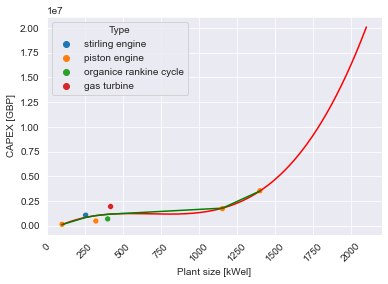

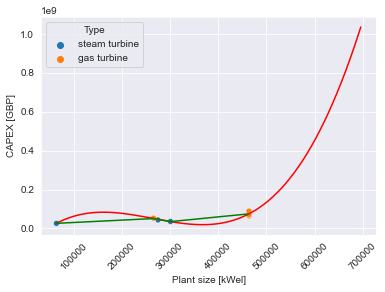

In [21]:
from functions.general.curve_fitting.depreciated.polynomial_regression_model_builder import \
    get_polynomial_model_and_performance

df_small_results_global_deg3 = get_polynomial_model_and_performance(dataframe=df_small,
                                                               x_data_label="Plant size [kWel]",
                                                               y_data_label=currency_and_CEPCI_scaled_label,
                                                               degree=3,
                                                               plot_x_label="Plant size [kWel]",
                                                               plot_y_label="CAPEX [GBP]",
                                                               plot_hue_label="Type",
                                                               display_fit=True)

df_medium_results_global_deg3 = get_polynomial_model_and_performance(dataframe=df_medium,
                                                                x_data_label="Plant size [kWel]",
                                                                y_data_label=currency_and_CEPCI_scaled_label,
                                                                degree=3,
                                                                plot_x_label="Plant size [kWel]",
                                                                plot_y_label="CAPEX [GBP]",
                                                                plot_hue_label="Type",
                                                                display_fit=True)



Small data set only


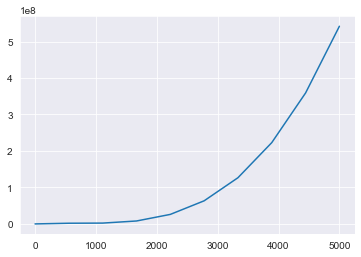

Large data set only


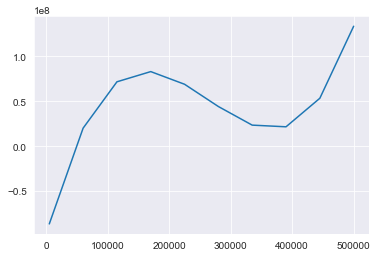

Combined data sets


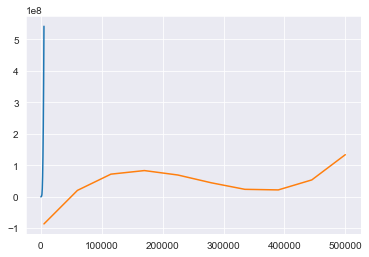

In [22]:
# Show predictions for 3rd degree polynomial case

x_test_small = np.linspace(0, 5000, 10)
x_test_medium = np.linspace(5000, 500000, 10)

poly_test_small_global = PolynomialFeatures(degree=df_small_results_global_deg3["degree"], include_bias=False)
poly_test_small_global.fit_transform(x_test_small.reshape(-1, 1))
y_pred_test_small_global = df_small_results_global_deg3["model"].predict(poly_test_small_global.fit_transform(x_test_small.reshape(-1, 1)))

poly_test_medium_global = PolynomialFeatures(degree=df_medium_results_global_deg3["degree"], include_bias=False)
poly_test_medium_global.fit_transform(x_test_medium.reshape(-1, 1))
y_pred_test_medium_global = df_medium_results_global_deg3["model"].predict(poly_test_medium_global.fit_transform(x_test_medium.reshape(-1, 1)))

print("Small data set only")
fig, ax = plt.subplots()
ax.plot(x_test_small, y_pred_test_small_global)
plt.show()

print("Large data set only")
fig, ax = plt.subplots()
ax.plot(x_test_medium, y_pred_test_medium_global)
plt.show()

print("Combined data sets")
fig, ax = plt.subplots()
ax.plot(x_test_small, y_pred_test_small_global)
ax.plot(x_test_medium, y_pred_test_medium_global)
plt.show()



This nicely illustrates why care has to be taken with the following two factors when fitting a model.
- The range over which the fitted model, models the data well.
- The importance of choosing a suitable order polynomial.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
x_data_label="Plant size [kWel]"
y_data_label=currency_and_CEPCI_scaled_label
data = df_small

# Extract x and y data and sort it
x_data = np.array(data[x_data_label])
y_data = np.array(data[y_data_label])
temp_sorting_df = pd.DataFrame({'x_sorted': x_data, 'y_sorted': y_data})
temp_sorting_df = temp_sorting_df.sort_values('x_sorted')
x_data = np.array(temp_sorting_df["x_sorted"]).reshape(-1, 1)
y_data = np.array(temp_sorting_df["y_sorted"])

plot_x_label="Plant size [kWel]"
plot_y_label="CAPEX [GBP]"
plot_hue_label="Type"
regressor_RF = RandomForestRegressor()
regressor_RF.fit(x_data, y_data)
score = regressor_RF.score(x_data,y_data)
y_predictions_RF = regressor_RF.predict(x_data)
RMSE = mean_squared_error(y_data, y_predictions_RF, squared=False)
print("R2:", score,"RMSE:", RMSE)

R2: 0.8808755283881614 RMSE: 368399.53846126434


In [24]:
df_medium_results_global

{'model': LinearRegression(),
 'R2': 0.8013393157171962,
 'RMSE': 9010806.920684585,
 'predictions': array([26822170.70568289, 42310637.86804749, 43407889.01837289,
        46772547.09588126, 74461819.45777753, 74461819.45777753,
        74461819.45777753]),
 'degree': 2}

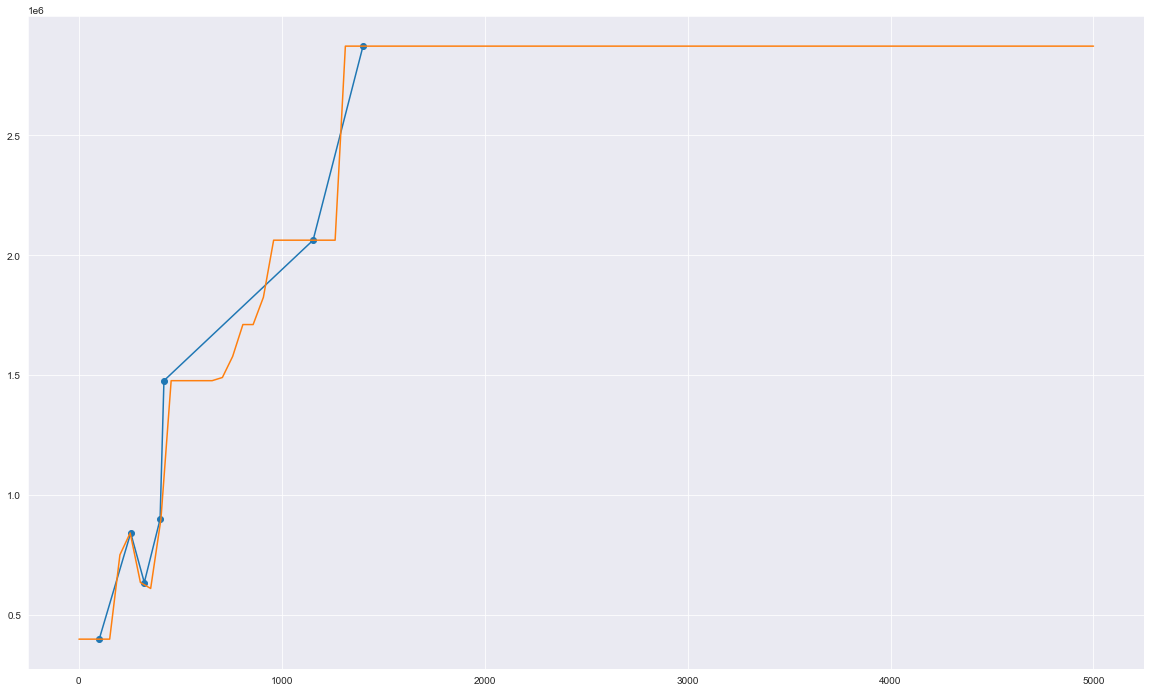

In [25]:
x_test_small_RF = np.linspace(0, 5000, 100).reshape(-1,1)
y_test_predictions_RF = regressor_RF.predict(x_test_small_RF)


fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(x_data, y_predictions_RF)
ax.plot(x_data, y_predictions_RF)
ax.plot(x_test_small_RF, y_test_predictions_RF)

plt.show()


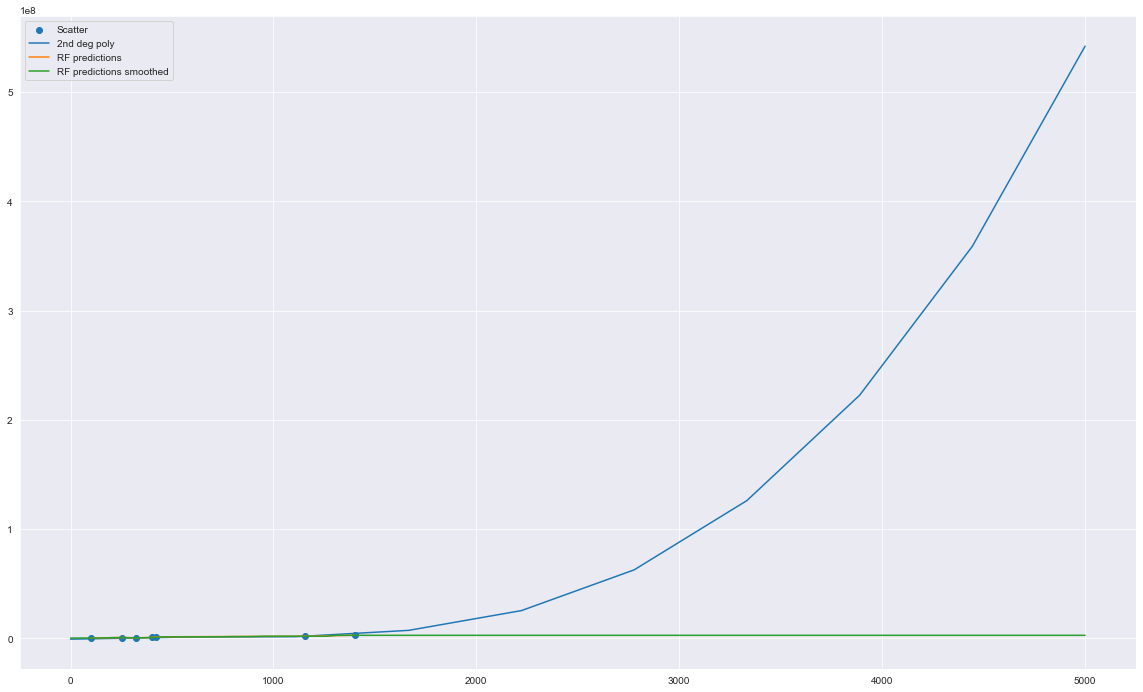

In [26]:
x_test_small_RF = np.linspace(0, 5000, 100).reshape(-1,1)
y_test_predictions_RF = regressor_RF.predict(x_test_small_RF)


fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(x_data, y_predictions_RF)
ax.plot(x_test_small, y_pred_test_small_global)
ax.plot(x_data, y_predictions_RF)
ax.plot(x_test_small_RF, y_test_predictions_RF)
ax.legend(["Scatter","2nd deg poly", "RF predictions", "RF predictions smoothed"])

plt.show()
